# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. EDA and Preprocessing](#3)
- [4. Feature Engineering](#4)
- [5. Assigning Feature and target variables](#5)
- [6. Feature Scaling](#6)
- [7. Spliting the data into Training and Testing Data](#7)
- [8. Modeling](#8)
    - [8.1 Logistic Regression](#8.1)
    - [8.2 Random Forest](#8.2)
    - [8.3 KNN](#8.3)
    - [8.4 Bagging](#8.4)
    - [8.5 Gradient Boosting](#8.5)
    - [8.6 Decision Tree](#8.6)
    - [8.7 SVM](#8.7)
- [9. TP, TN, FP, FN](#9)
    - [9.1 Logistic Regression](#9.1)
    - [9.2 Random Forest](#9.2)
    - [9.3 KNN](#9.3)
    - [9.4 Bagging](#9.4)
    - [9.5 Gradient Boosting](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. Auto Machine Learning](#10)

<a id='2'></a>
# Import Necessaries Libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier

import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# EDA and Preprocessing

In [4]:
df = pd.read_csv('../../../Datasets/Classification/Red_Wine_Quality/winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [10]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

All the Features are continous

In [12]:
FEATURES = [col for col in df.columns if col not in ['quality']]
FEATURES

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

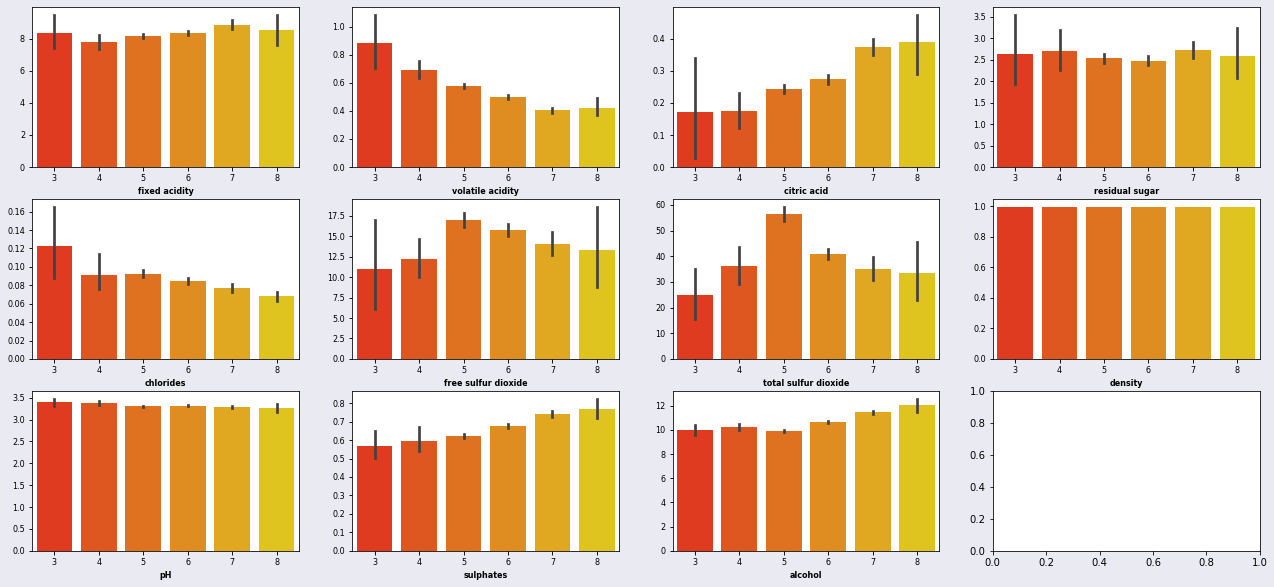

In [13]:
# barplot for all the features of the data (Target on x-axis, features on y-axis)
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

try:
    for r in range(nrows):
        for c in range(ncols):
            col = FEATURES[r*ncols+c]
            sns.barplot(y=df[col], x=df['quality'], ax=axes[r, c], palette='autumn')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=8, width=0.9)
            axes[r, c].xaxis.offsetText.set_fontsize(10)
            axes[r, c].yaxis.offsetText.set_fontsize(10)
except:
    pass
plt.show()

- fixed acidity does not give any specification to classify the quality.
- It's a big downside at volatile acidity as we rise in quality
- Composition of citric acid go higher as we go higher in the quality of the wine
- residual Sugar does not give any specification to classify the quality.
- Composition of chloride also go down as we go higher in the quality of the wine.
- free sulpher dixoide does not give any specification to classify the quality.
- total sulpher dixoide does not give any specification to classify the quality.
- Sulphates level goes higher with the quality of wine
- Alcohol level also goes higher as the quality of wine increases

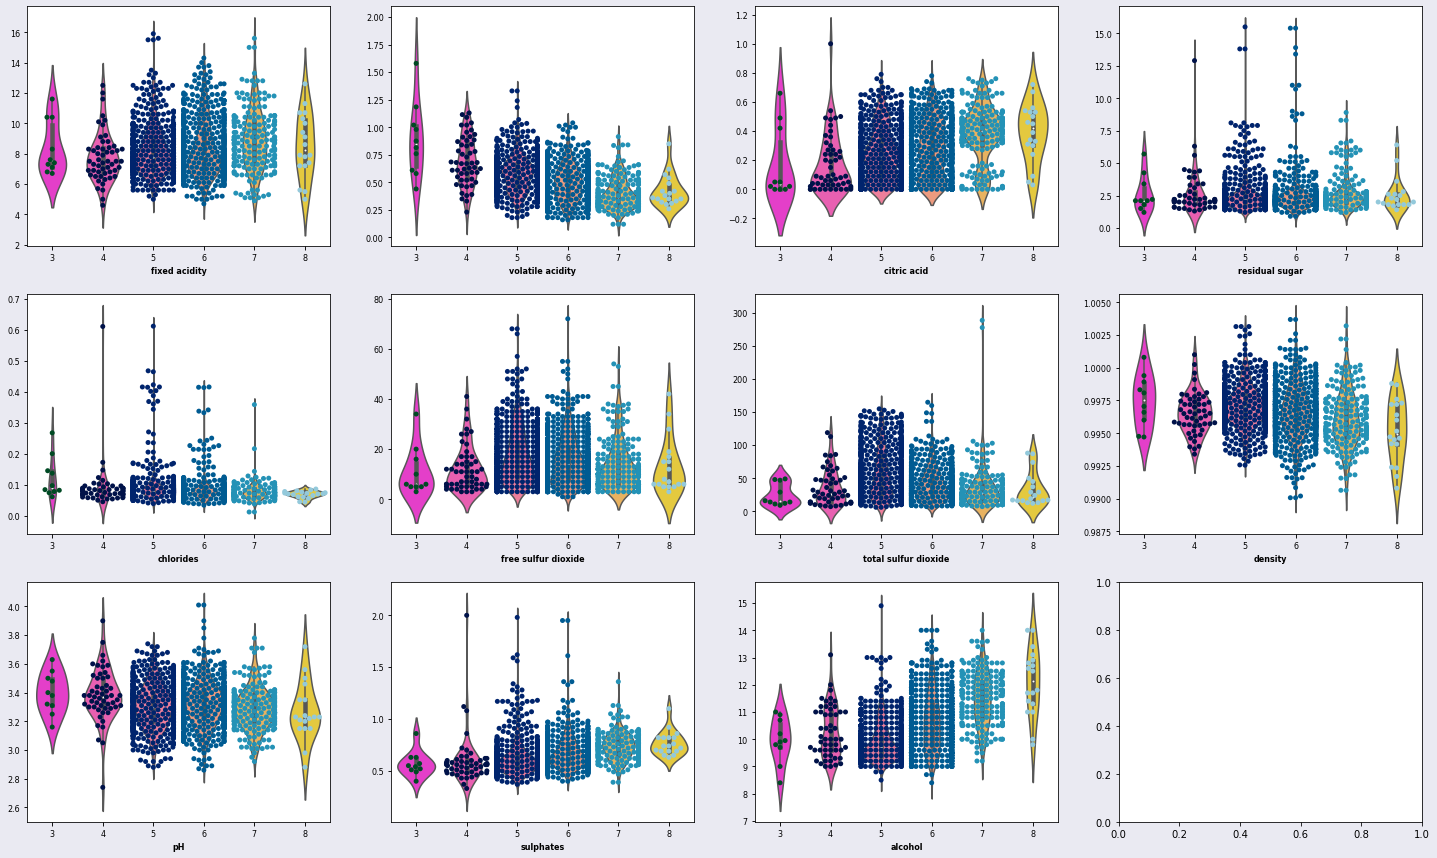

In [14]:
# barplot for all the features of the data (Target on x-axis, features on y-axis)
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 15), facecolor='#EAEAF2')
try:
    for r in range(nrows):
        for c in range(ncols):
            col = FEATURES[r*ncols+c]
            sns.violinplot(y=df[col], x=df['quality'], ax=axes[r, c], palette='spring')
            sns.swarmplot(y=df[col], x=df['quality'], ax=axes[r, c], palette='ocean')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=8, width=0.9)
            axes[r, c].xaxis.offsetText.set_fontsize(10)
            axes[r, c].yaxis.offsetText.set_fontsize(10)
except:
    pass
plt.show()

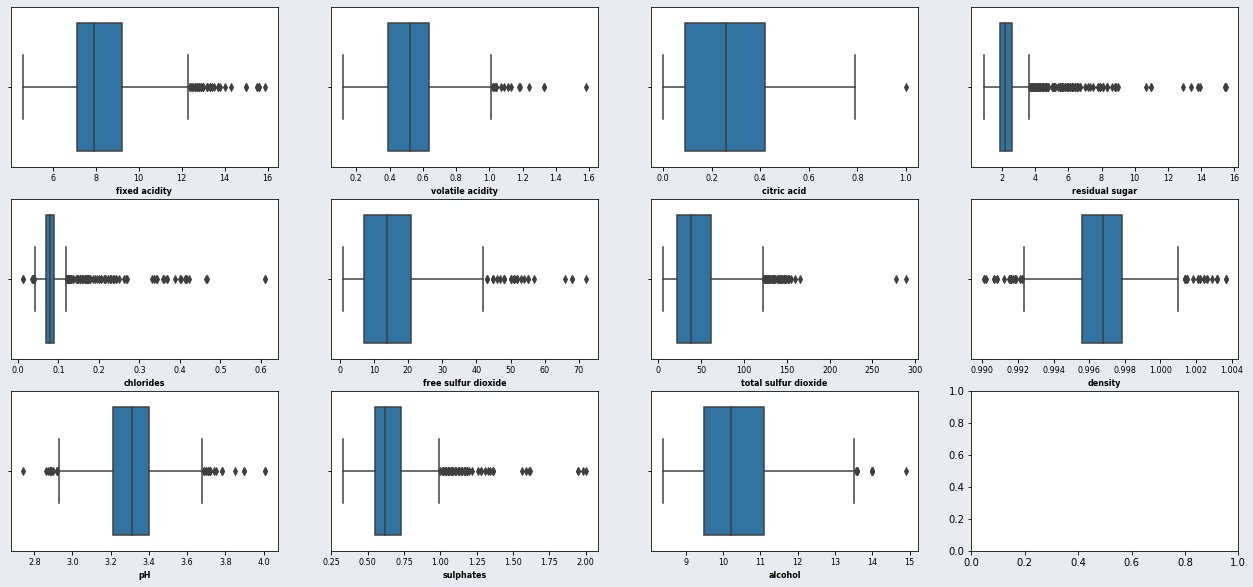

In [15]:
# barplot for all the features of the data (Target on x-axis, features on y-axis)
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')
try:
    for r in range(nrows):
        for c in range(ncols):
            col = FEATURES[r*ncols+c]
            sns.boxplot(x=df[col], ax=axes[r, c])
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=8, width=0.9)
            axes[r, c].xaxis.offsetText.set_fontsize(10)
            axes[r, c].yaxis.offsetText.set_fontsize(10)
except:
    pass
plt.show()

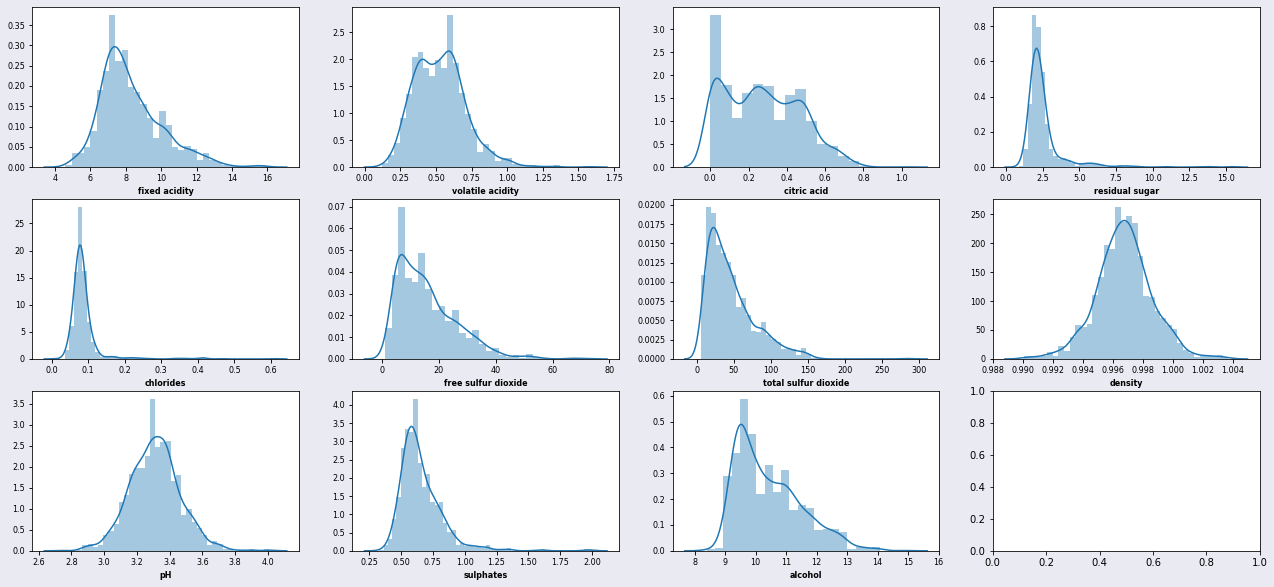

In [16]:
# barplot for all the features of the data (Target on x-axis, features on y-axis)
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')
try:
    for r in range(nrows):
        for c in range(ncols):
            col = FEATURES[r*ncols+c]
            sns.distplot(x=df[col], ax=axes[r, c])
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=8, width=0.9)
            axes[r, c].xaxis.offsetText.set_fontsize(10)
            axes[r, c].yaxis.offsetText.set_fontsize(10)
except:
    pass
plt.show()

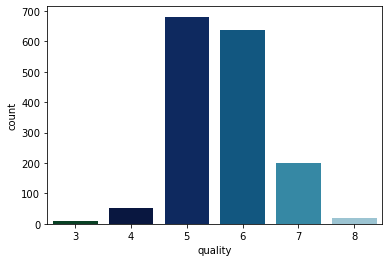

In [17]:
sns.countplot(x='quality', data=df, palette='ocean');

- 5,6 quality wines are the most popular

In [18]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


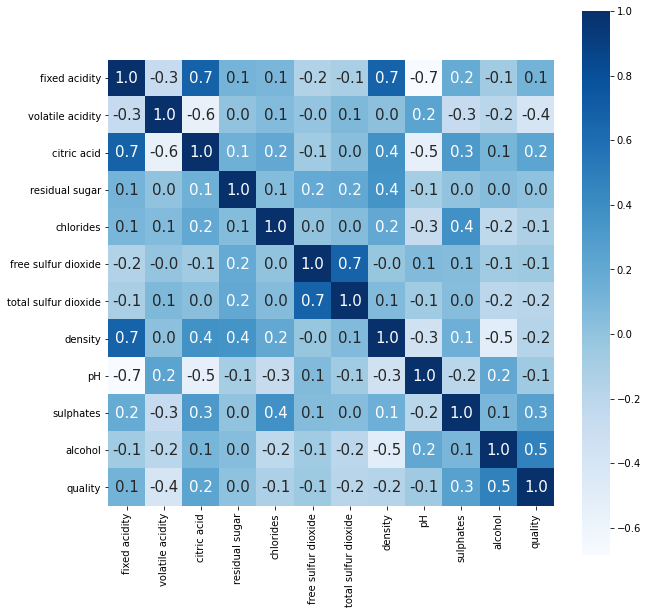

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':15}, cmap = 'Blues');

- fixed acidity is highly positivily correlated with (citric acid, density) and highly negativaly correlated with pH
- free sulfur dixoid is highly positivily correlated with total sulfur dioxide
- quality is 50% positivily correlated with alcohol

change quality as following:<br>
3,4,5,6 -> bad quality(0)<br>
7,8 -> good quality (1)

In [21]:
df.quality=df.quality.apply(lambda x: 0 if x<7 else 1)
df.quality.unique()

array([0, 1], dtype=int64)

In [22]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

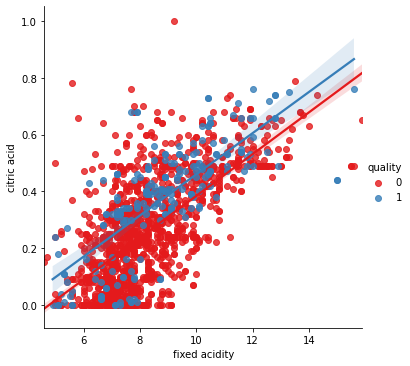

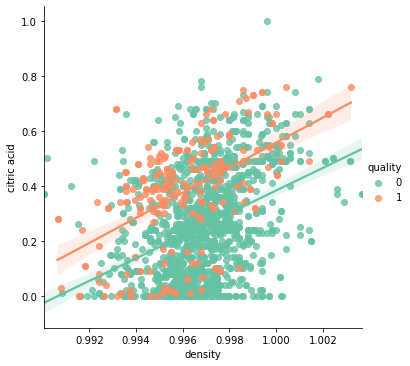

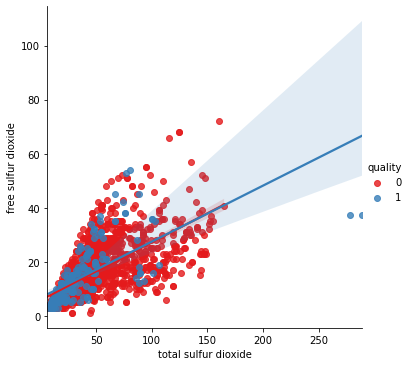

In [23]:
# Plot the correlated features
sns.lmplot(y='citric acid', x='fixed acidity', hue='quality', data=df, palette='Set1')
sns.lmplot(y='citric acid', x='density', hue='quality', data=df, palette='Set2')
sns.lmplot(y='free sulfur dioxide', x='total sulfur dioxide', hue='quality', data=df, palette='Set1');

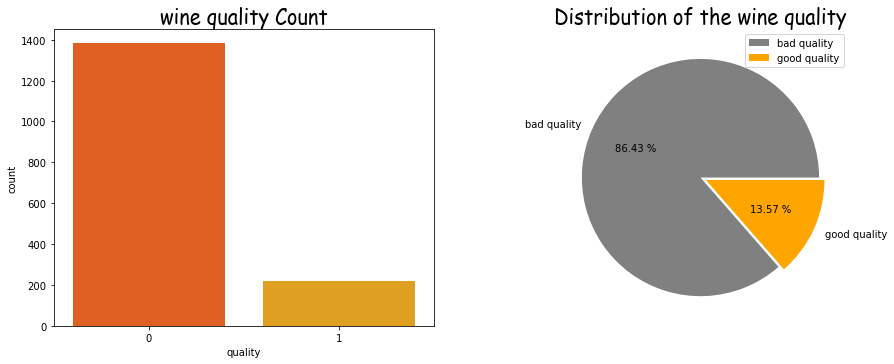

In [24]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.title("wine quality Count", fontdict={'fontname' : 'Comic Sans Ms', 'fontsize' : 20})
sns.countplot(x='quality', data=df, palette='autumn');

plt.subplot(2,2,2)
plt.title("Distribution of the wine quality", fontdict={'fontname' : 'Comic Sans Ms', 'fontsize' : 20})
labels = ['bad quality', 'good quality']
bad_quality = df.quality[df.quality==0].count()
good_quality = df.quality[df.quality==1].count()
qualities = [bad_quality, good_quality]
explode=[0,0.05]

plt.pie(qualities, labels=labels, autopct='%.2f %%', explode=explode, colors=['grey', 'orange'])
plt.legend()
plt.show()

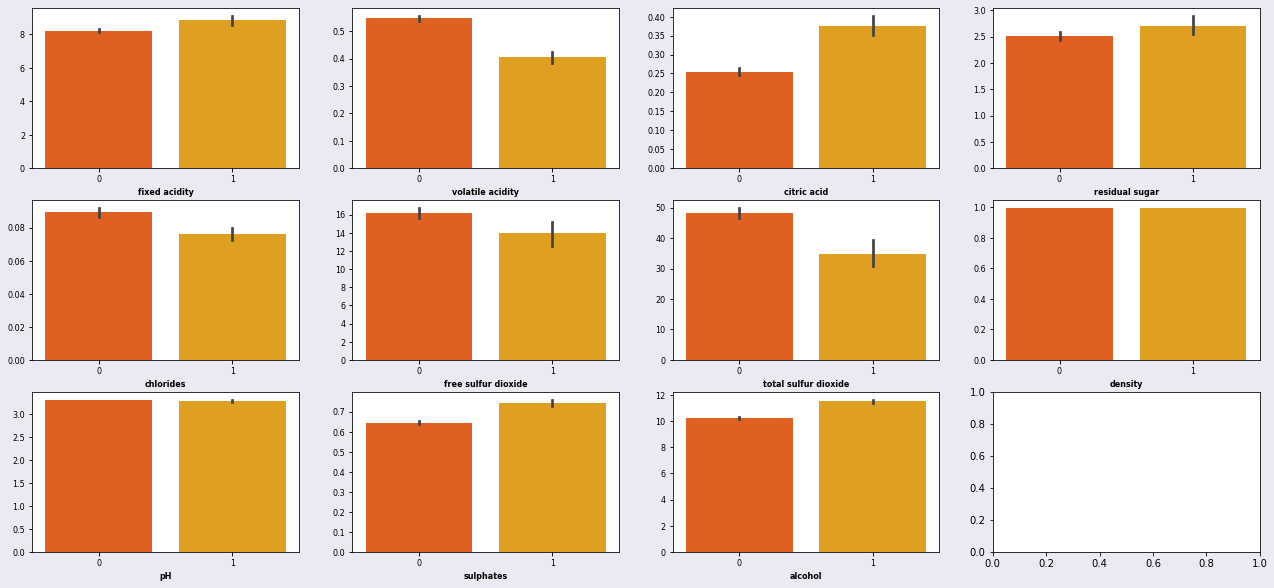

In [25]:
# barplot for all the features of the data (Target on x-axis, features on y-axis)
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

try:
    for r in range(nrows):
        for c in range(ncols):
            col = FEATURES[r*ncols+c]
            sns.barplot(y=df[col], x=df['quality'], ax=axes[r, c], palette='autumn')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=8, width=0.9)
            axes[r, c].xaxis.offsetText.set_fontsize(10)
            axes[r, c].yaxis.offsetText.set_fontsize(10)
except:
    pass
plt.show()

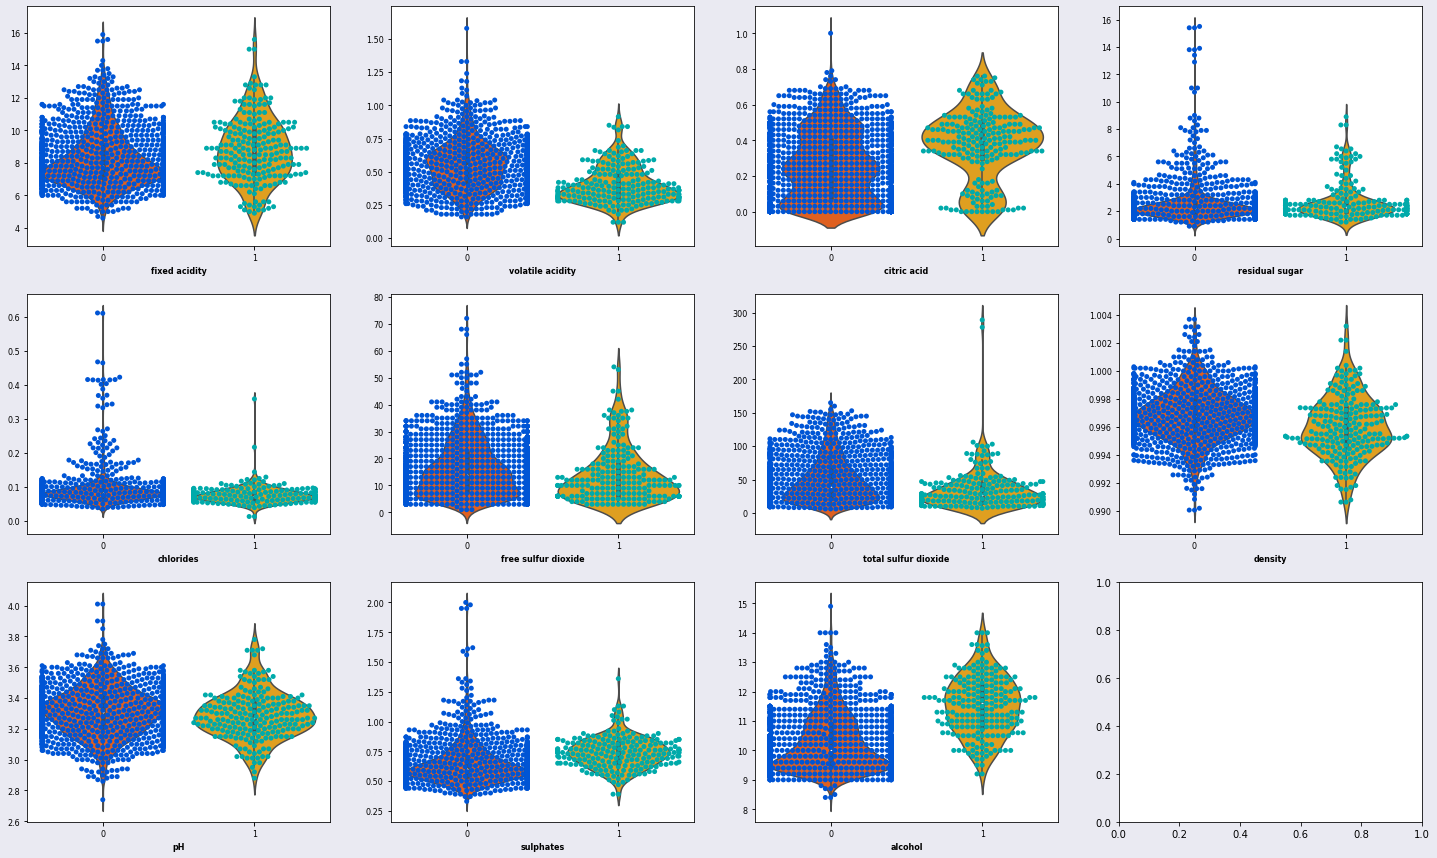

In [26]:
# barplot for all the features of the data (Target on x-axis, features on y-axis)
ncols = 4
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 15), facecolor='#EAEAF2')
try:
    for r in range(nrows):
        for c in range(ncols):
            col = FEATURES[r*ncols+c]
            sns.violinplot(y=df[col], x=df['quality'], ax=axes[r, c], palette='autumn')
            sns.swarmplot(y=df[col], x=df['quality'], ax=axes[r, c], palette='winter')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=8, width=0.9)
            axes[r, c].xaxis.offsetText.set_fontsize(10)
            axes[r, c].yaxis.offsetText.set_fontsize(10)
except:
    pass
plt.show()

<a id='4'></a>
# Feature Engineering

In [27]:
df["mean"] = df[FEATURES].mean(axis=1)
df["std"] = df[FEATURES].std(axis=1)
df["min"] = df[FEATURES].min(axis=1)
df["max"] = df[FEATURES].max(axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mean,std,min,max
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,6.322164,9.990935,0.000,34.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,10.732255,20.057731,0.000,67.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,8.609000,15.813090,0.040,54.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,9.595727,17.643548,0.075,60.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,6.322164,9.990935,0.000,34.0


<a id='5'></a>
# Assign Feature and target variables

In [28]:
X = df.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,mean,std,min,max
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6.322164,9.990935,0.000,34.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,10.732255,20.057731,0.000,67.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,8.609000,15.813090,0.040,54.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,9.595727,17.643548,0.075,60.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6.322164,9.990935,0.000,34.0


In [29]:
y = df.quality

<a id='6'></a>
# Scalling the Features

In [30]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.43583645,
        -1.48300798, -0.38350981],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.61388836,
        -1.48300798,  0.62340953],
       [-0.29854743,  1.29706527, -1.18607043, ...,  0.17127431,
        -0.68128041,  0.22674434],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ..., -0.07515426,
         0.0402744 , -0.20043357],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.07059729,
         0.02023121, -0.07838274],
       [-1.33270223, -1.21684919,  1.02199944, ..., -0.16232053,
        -0.1401143 , -0.13940815]])

<a id='7'></a>
# Spliting the data into training and testing data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.30, random_state=0)

In [32]:
print(f"Number of Training dataset: {len(X_train)}\nNumber of Testing dataset: {len(X_test)}")

Number of Training dataset: 1119
Number of Testing dataset: 480


<a id='8'></a>
# Modeling

In [33]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='8.1'></a>
## Logistic Regression

In [34]:
lr = LogisticRegression()
kfolds(lr, 'Logistic Regression')
train(lr, 'Logistic Regression')

Logistic Regression score on cross validation: 86.99174528301887%
Logistic Regression model score on Training data: 87.1313672922252%
Logistic Regression model score on Testing data: 89.79166666666667%


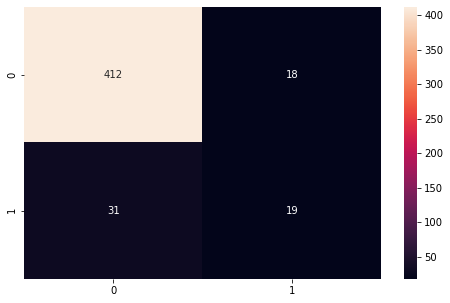

In [35]:
conf_matrix(lr)

In [36]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       430
           1       0.51      0.38      0.44        50

    accuracy                           0.90       480
   macro avg       0.72      0.67      0.69       480
weighted avg       0.89      0.90      0.89       480



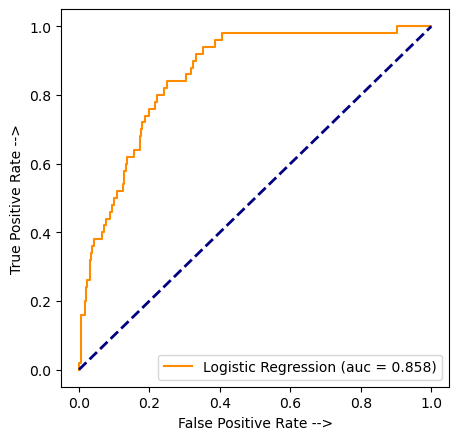

In [37]:
roc(lr, "Logistic Regression")

<a id='8.2'></a>
## Random Forest

In [38]:
rf = RandomForestClassifier(n_estimators=100)
kfolds(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 87.3058176100629%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 92.91666666666667%


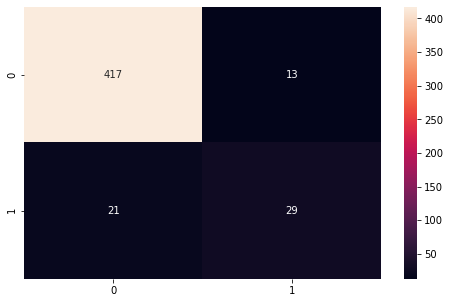

In [39]:
conf_matrix(rf)

In [40]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       430
           1       0.69      0.58      0.63        50

    accuracy                           0.93       480
   macro avg       0.82      0.77      0.80       480
weighted avg       0.92      0.93      0.93       480



<a id='8.3'></a>
## KNN

In [41]:
knn = KNeighborsClassifier(n_neighbors=2)
kfolds(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 85.55345911949686%
KNN model score on Training data: 93.7444146559428%
KNN model score on Testing data: 90.83333333333333%


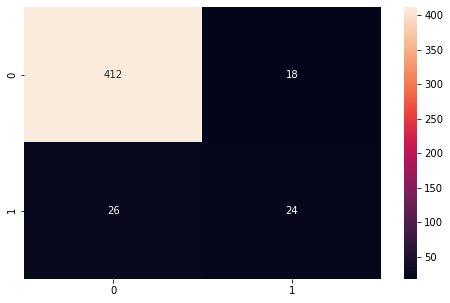

In [42]:
conf_matrix(knn)

In [43]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       430
           1       0.57      0.48      0.52        50

    accuracy                           0.91       480
   macro avg       0.76      0.72      0.74       480
weighted avg       0.90      0.91      0.90       480



<a id='8.4'></a>
## Bagging

In [44]:
bagg = BaggingClassifier(n_estimators=10)
kfolds(bagg, 'Bagging')
train(bagg, "Bagging")

Bagging score on cross validation: 87.36792452830188%
Bagging model score on Training data: 99.37444146559427%
Bagging model score on Testing data: 90.41666666666667%


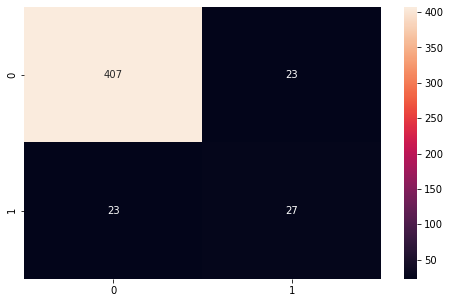

In [45]:
conf_matrix(bagg)

In [46]:
class_report(bagg)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       430
           1       0.54      0.54      0.54        50

    accuracy                           0.90       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.90      0.90      0.90       480



<a id='8.5'></a>
## Gradient Boosting

In [47]:
gb = GradientBoostingClassifier(n_estimators=20)
kfolds(gb, "Gradient Boosting")
train(gb, "Gradient Boosting")

Gradient Boosting score on cross validation: 87.80581761006289%
Gradient Boosting model score on Training data: 91.33154602323503%
Gradient Boosting model score on Testing data: 90.83333333333333%


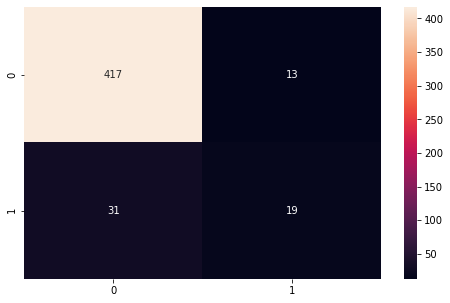

In [48]:
conf_matrix(gb)

In [49]:
class_report(gb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.59      0.38      0.46        50

    accuracy                           0.91       480
   macro avg       0.76      0.67      0.71       480
weighted avg       0.90      0.91      0.90       480



<a id='8.6'></a>
## Decision Tree

In [50]:
dt = DecisionTreeClassifier()
kfolds(dt, 'Decision Tree')
train(dt, "Decision Tree")

Decision Tree score on cross validation: 82.4249213836478%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 89.79166666666667%


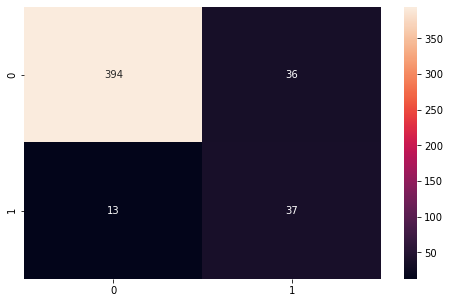

In [51]:
conf_matrix(dt)

In [52]:
class_report(dt)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       430
           1       0.51      0.74      0.60        50

    accuracy                           0.90       480
   macro avg       0.74      0.83      0.77       480
weighted avg       0.92      0.90      0.91       480



<a id='8.7'></a>
## SVM

In [53]:
svm = SVC(gamma='auto', C=2)
kfolds(svm, "SVM")
train(svm, "SVM")

SVM score on cross validation: 85.24135220125785%
SVM model score on Training data: 89.36550491510276%
SVM model score on Testing data: 91.25%


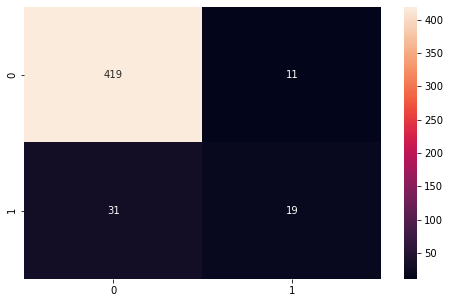

In [54]:
conf_matrix(svm)

In [55]:
class_report(svm)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.63      0.38      0.48        50

    accuracy                           0.91       480
   macro avg       0.78      0.68      0.71       480
weighted avg       0.90      0.91      0.90       480



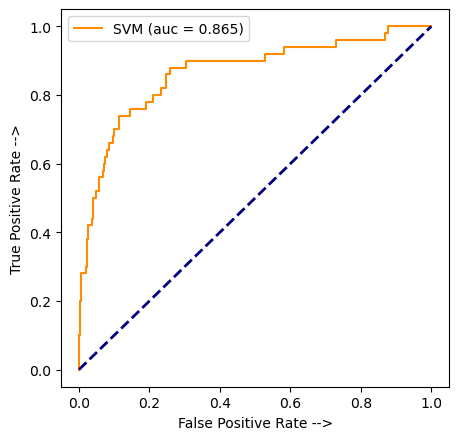

In [56]:
roc(svm, "SVM")

<a id='9'></a>
# TP, TN, FP, FN

In [57]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {ACC*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='9.1'></a>
## Logistic Regression

In [58]:
tp(lr, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 89.79166666666667%
Sensitivity Accuarcy of Logistic Regression: 38.0%
Specificity Negative Rate Accuarcy of Logistic Regression: 95.81395348837209%
Negative predictive value Accuarcy of Logistic Regression: 93.00225733634312%
Fall out Accuarcy of Logistic Regression: 4.186046511627907%
False negative rate Accuarcy of Logistic Regression: 62.0%
False discovery rate Accuarcy of Logistic Regression: 48.64864864864865%


<a id='9.2'></a>
## Random Forest

In [59]:
tp(rf, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 92.91666666666667%
Sensitivity Accuarcy of Random Forest: 57.99999999999999%
Specificity Negative Rate Accuarcy of Random Forest: 96.97674418604652%
Negative predictive value Accuarcy of Random Forest: 95.2054794520548%
Fall out Accuarcy of Random Forest: 3.0232558139534884%
False negative rate Accuarcy of Random Forest: 42.0%
False discovery rate Accuarcy of Random Forest: 30.952380952380953%


<a id='9.3'></a>
## KNN

In [60]:
tp(knn, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 90.83333333333333%
Sensitivity Accuarcy of KNN: 48.0%
Specificity Negative Rate Accuarcy of KNN: 95.81395348837209%
Negative predictive value Accuarcy of KNN: 94.06392694063926%
Fall out Accuarcy of KNN: 4.186046511627907%
False negative rate Accuarcy of KNN: 52.0%
False discovery rate Accuarcy of KNN: 42.857142857142854%


<a id='9.4'></a>
## Bagging

In [61]:
tp(bagg, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 90.41666666666667%
Sensitivity Accuarcy of Bagging: 54.0%
Specificity Negative Rate Accuarcy of Bagging: 94.65116279069767%
Negative predictive value Accuarcy of Bagging: 94.65116279069767%
Fall out Accuarcy of Bagging: 5.348837209302325%
False negative rate Accuarcy of Bagging: 46.0%
False discovery rate Accuarcy of Bagging: 46.0%


<a id='9.5'></a>
## Gradient Boosting

In [62]:
tp(gb, "Gradient Boosting")

TP, FN, TP, FP Overall Accuarcy of Gradient Boosting: 90.83333333333333%
Sensitivity Accuarcy of Gradient Boosting: 38.0%
Specificity Negative Rate Accuarcy of Gradient Boosting: 96.97674418604652%
Negative predictive value Accuarcy of Gradient Boosting: 93.08035714285714%
Fall out Accuarcy of Gradient Boosting: 3.0232558139534884%
False negative rate Accuarcy of Gradient Boosting: 62.0%
False discovery rate Accuarcy of Gradient Boosting: 40.625%


<a id='9.6'></a>
## Decision Tree

In [63]:
tp(dt, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 89.79166666666667%
Sensitivity Accuarcy of Decision Tree: 74.0%
Specificity Negative Rate Accuarcy of Decision Tree: 91.62790697674419%
Negative predictive value Accuarcy of Decision Tree: 96.80589680589681%
Fall out Accuarcy of Decision Tree: 8.372093023255815%
False negative rate Accuarcy of Decision Tree: 26.0%
False discovery rate Accuarcy of Decision Tree: 49.31506849315068%


<a id='9.7'></a>
## SVM

In [64]:
tp(svm, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 91.25%
Sensitivity Accuarcy of SVM: 38.0%
Specificity Negative Rate Accuarcy of SVM: 97.44186046511628%
Negative predictive value Accuarcy of SVM: 93.11111111111111%
Fall out Accuarcy of SVM: 2.558139534883721%
False negative rate Accuarcy of SVM: 62.0%
False discovery rate Accuarcy of SVM: 36.666666666666664%


<a id='10'></a>
# Auto ML

In [66]:
tpot = TPOTClassifier(
                     generations= 10,
                     population_size=100,
                     cv=5,
                     verbosity=2,
                     random_state=0
)
train(tpot, "Auto ML")

                                                                                 
Generation 1 - Current best internal CV score: 0.8936659192825112
                                                                                 
Generation 2 - Current best internal CV score: 0.8945547725816784
                                                                                 
Generation 3 - Current best internal CV score: 0.8954636450992952
                                                                                 
Generation 4 - Current best internal CV score: 0.9008247918001281
                                                                                 
Generation 5 - Current best internal CV score: 0.9008247918001281
                                                                                 
Generation 6 - Current best internal CV score: 0.9008247918001281
                                                                                 
Generation 7 - Current best in

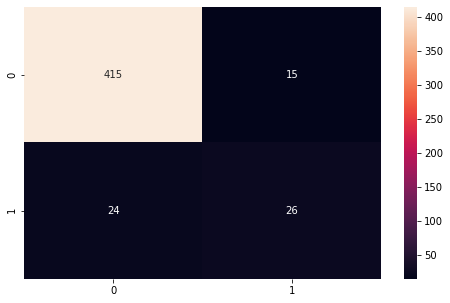

In [67]:
conf_matrix(tpot)

In [68]:
class_report(tpot)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       430
           1       0.63      0.52      0.57        50

    accuracy                           0.92       480
   macro avg       0.79      0.74      0.76       480
weighted avg       0.91      0.92      0.92       480



In [69]:
tp(tpot, "Auto ML")

TP, FN, TP, FP Overall Accuarcy of Auto ML: 91.875%
Sensitivity Accuarcy of Auto ML: 52.0%
Specificity Negative Rate Accuarcy of Auto ML: 96.51162790697676%
Negative predictive value Accuarcy of Auto ML: 94.53302961275627%
Fall out Accuarcy of Auto ML: 3.488372093023256%
False negative rate Accuarcy of Auto ML: 48.0%
False discovery rate Accuarcy of Auto ML: 36.58536585365854%
